# Importing the Data

In [ ]:
import pandas as pd

In [ ]:
df_movies = pd.read_csv('/content/drive/MyDrive/MovieRatings.csv')

In [ ]:
df_movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [ ]:
df_movies.tail()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009
558,Zookeeper,Comedy,14,42,80,2011


In [ ]:
df_movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [ ]:
df_movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year'] #Columns Renamed 

In [ ]:
df_movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [ ]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Film            559 non-null    object
 1   Genre           559 non-null    object
 2   CriticRating    559 non-null    int64 
 3   AudienceRating  559 non-null    int64 
 4   BudgetMillions  559 non-null    int64 
 5   Year            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [ ]:
df_movies.describe() #Makes no sense when we are talking about the YEAR Column. 

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [ ]:
# Converting the type's to Category. 

df_movies.Film = df_movies.Film.astype('category')
df_movies.Genre = df_movies.Genre.astype('category')
df_movies.Year = df_movies.Year.astype('category')

In [ ]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [ ]:
df_movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


# Working with Joinplots

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

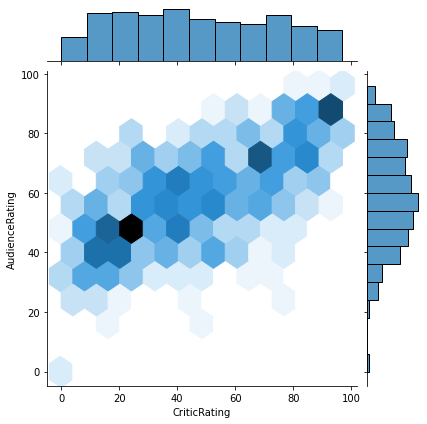

In [ ]:
j = sns.jointplot(data = df_movies, x = 'CriticRating', y='AudienceRating', kind='hex')

# Histograms

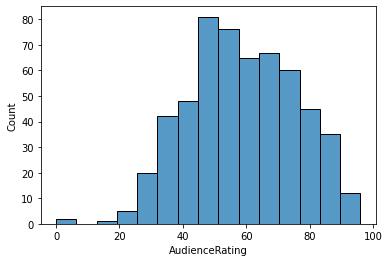

In [ ]:
hist = sns.histplot(df_movies.AudienceRating, bins=15)

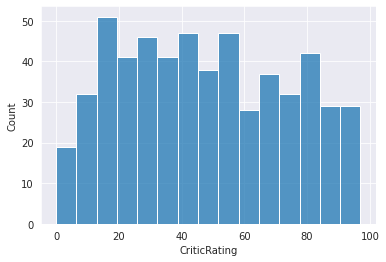

In [ ]:
sns.set_style('darkgrid')
hist1 = sns.histplot(df_movies.CriticRating, bins=15)

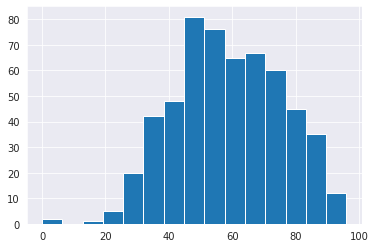

In [ ]:
hist2 = plt.hist(df_movies.AudienceRating, bins= 15) #Appears to show some kind of a Normal Distribution

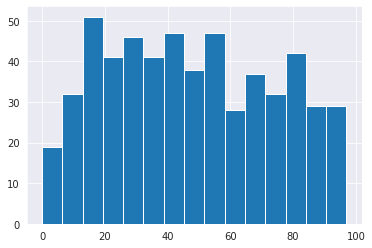

In [ ]:
hist3 = plt.hist(df_movies.CriticRating, bins= 15)

## Stacked Histograms in Python

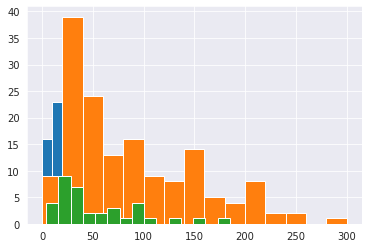

In [ ]:
df_movies[df_movies.Genre == "Drama"].BudgetMillions

hist4 = plt.hist(df_movies[df_movies.Genre == "Drama"].BudgetMillions, bins= 15)
hist4 = plt.hist(df_movies[df_movies.Genre == "Action"].BudgetMillions, bins= 15)
hist4 = plt.hist(df_movies[df_movies.Genre == "Thriller"].BudgetMillions, bins= 15)

In [ ]:
for gen in df_movies.Genre.cat.categories:
  print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


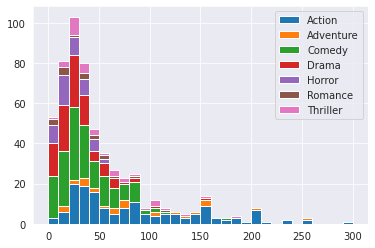

In [ ]:
list1 = []
labels = []

for gen in df_movies.Genre.cat.categories:
  list1.append(df_movies[df_movies.Genre == gen].BudgetMillions)
  labels.append(gen)

hist5 = plt.hist(list1, bins=30, stacked=True, rwidth=1, label=labels)
plt.legend()
plt.show()

# KDE Plot

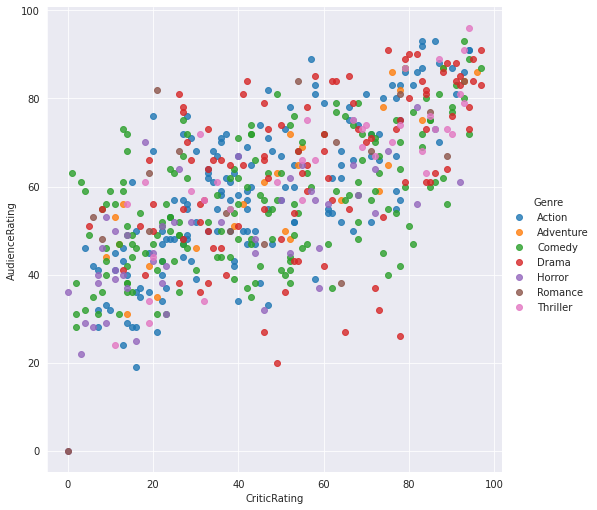

In [ ]:
sns.set_style('darkgrid')
vis1 = sns.lmplot(data = df_movies, x = 'CriticRating', y='AudienceRating', hue = 'Genre', size=7, aspect=1, fit_reg=False)

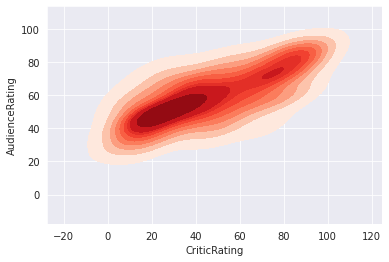

In [ ]:
kde1 = sns.kdeplot(df_movies.CriticRating, df_movies.AudienceRating, shade= True, Shade_lowest= False, cmap='Reds')

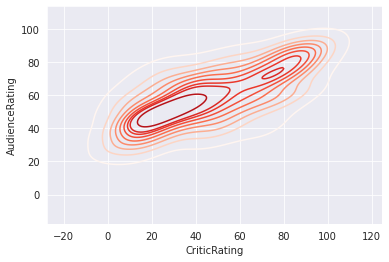

In [ ]:
kde2 = sns.kdeplot(df_movies.CriticRating, df_movies.AudienceRating, cmap='Reds')

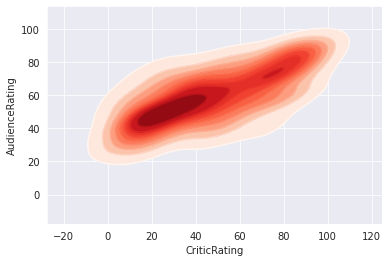

In [ ]:
kde1 = sns.kdeplot(df_movies.CriticRating, df_movies.AudienceRating, shade= True, Shade_lowest= False, cmap='Reds')
kde2 = sns.kdeplot(df_movies.CriticRating, df_movies.AudienceRating, cmap='Reds')

# Working with Subplots

Creates a sophisticated visualization to combine visualizations together. 

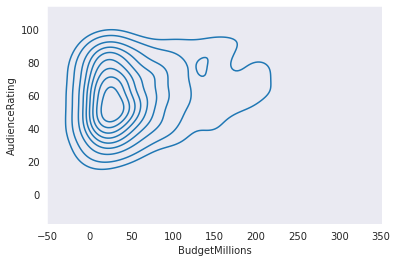

In [ ]:
sns.set_style('dark')
kde3 = sns.kdeplot(df_movies.BudgetMillions, df_movies.AudienceRating)

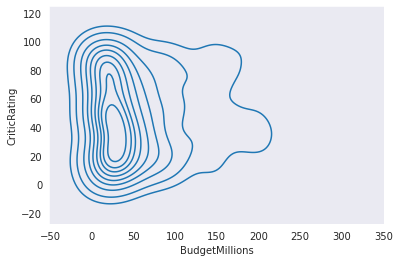

In [ ]:
sns.set_style('dark')
kde4 = sns.kdeplot(df_movies.BudgetMillions, df_movies.CriticRating)

[(-40.0, 230.0)]

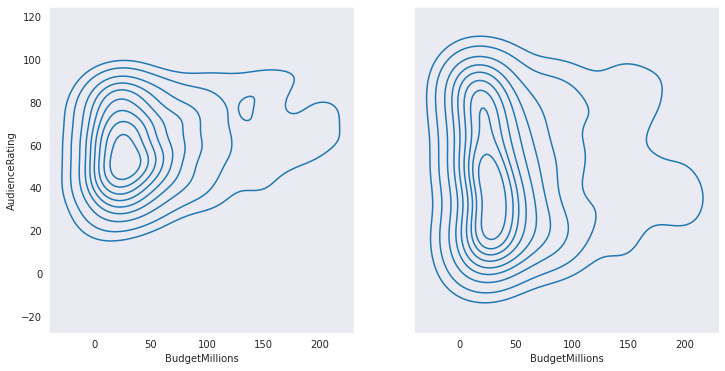

In [ ]:
f , axes = plt.subplots(1, 2, figsize=(12,6), sharex =True, sharey=True)

kde3 = sns.kdeplot(df_movies.BudgetMillions, df_movies.AudienceRating, ax=axes[0])
kde4 = sns.kdeplot(df_movies.BudgetMillions, df_movies.CriticRating, ax=axes[1])
kde3.set(xlim=(-40,230))

In [ ]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9686f84be0>,
      dtype=object)

# Violinplots vs Boxplots

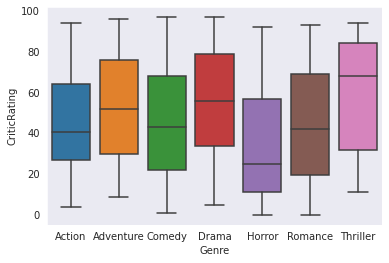

In [ ]:
box = sns.boxplot(data=df_movies, x='Genre', y='CriticRating')

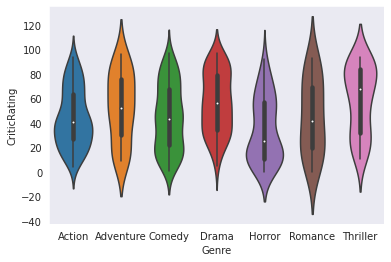

In [ ]:
violin = sns.violinplot(data=df_movies, x='Genre', y='CriticRating')

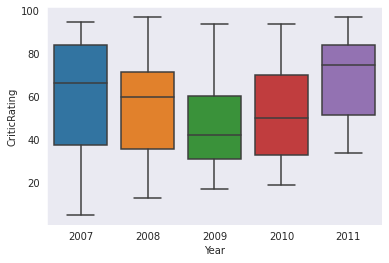

In [ ]:
box1 = sns.boxplot(data=df_movies[df_movies.Genre == 'Drama'], x='Year', y='CriticRating')

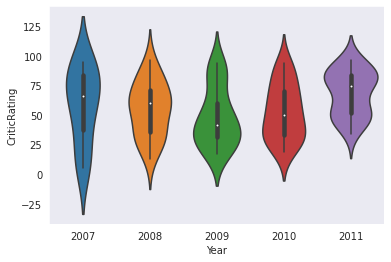

In [ ]:
violin1 = sns.violinplot(data=df_movies[df_movies.Genre == 'Drama'], x='Year', y='CriticRating')

# Creating a Facet Grid

Splitting up a single visualization

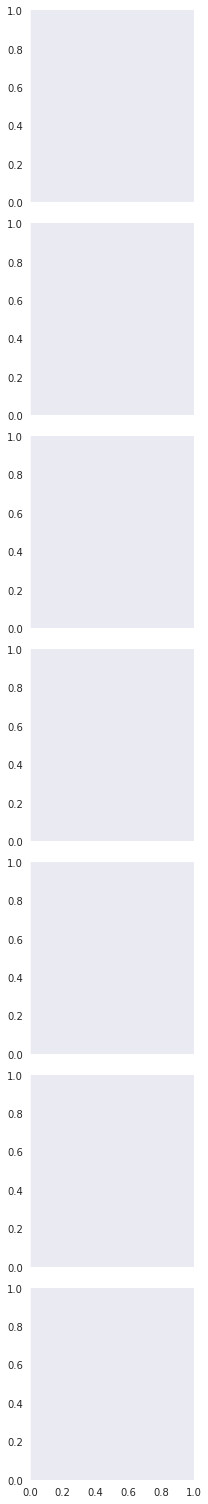

In [ ]:
fg = sns.FacetGrid(df_movies, row='Genre', hue='Genre')

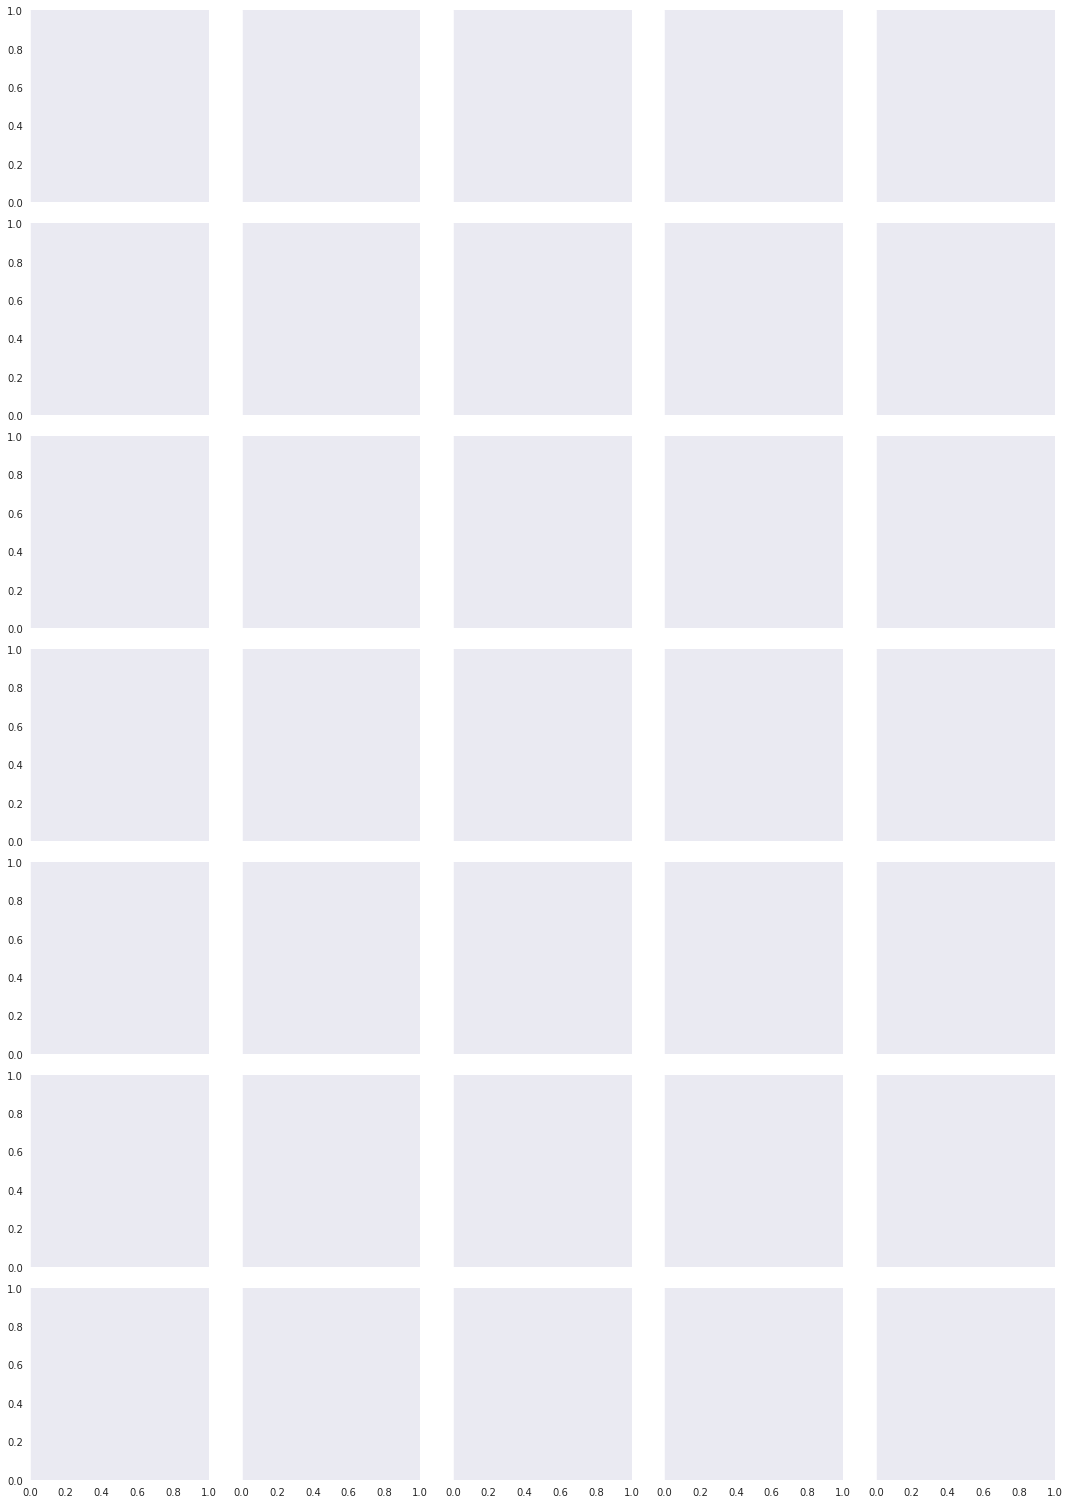

In [ ]:
fg = sns.FacetGrid(df_movies, row='Genre', col='Year', hue='Genre')

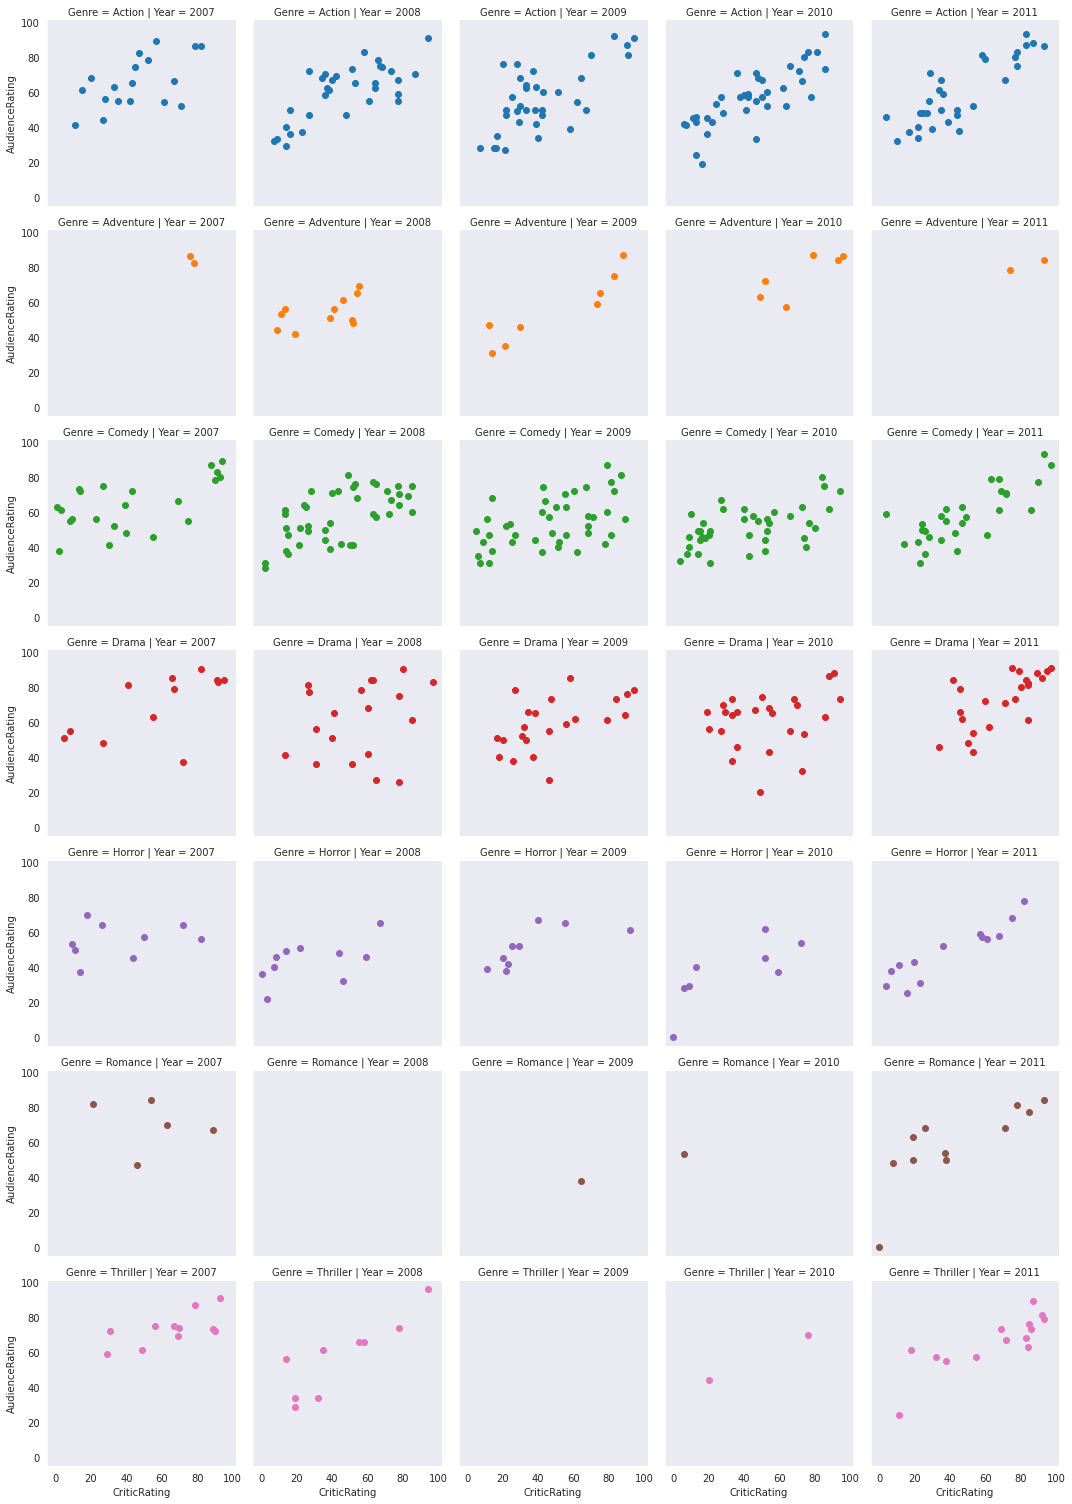

In [ ]:
fg = sns.FacetGrid(df_movies, row='Genre', col='Year', hue='Genre')
fg = fg.map(plt.scatter, 'CriticRating', 'AudienceRating')

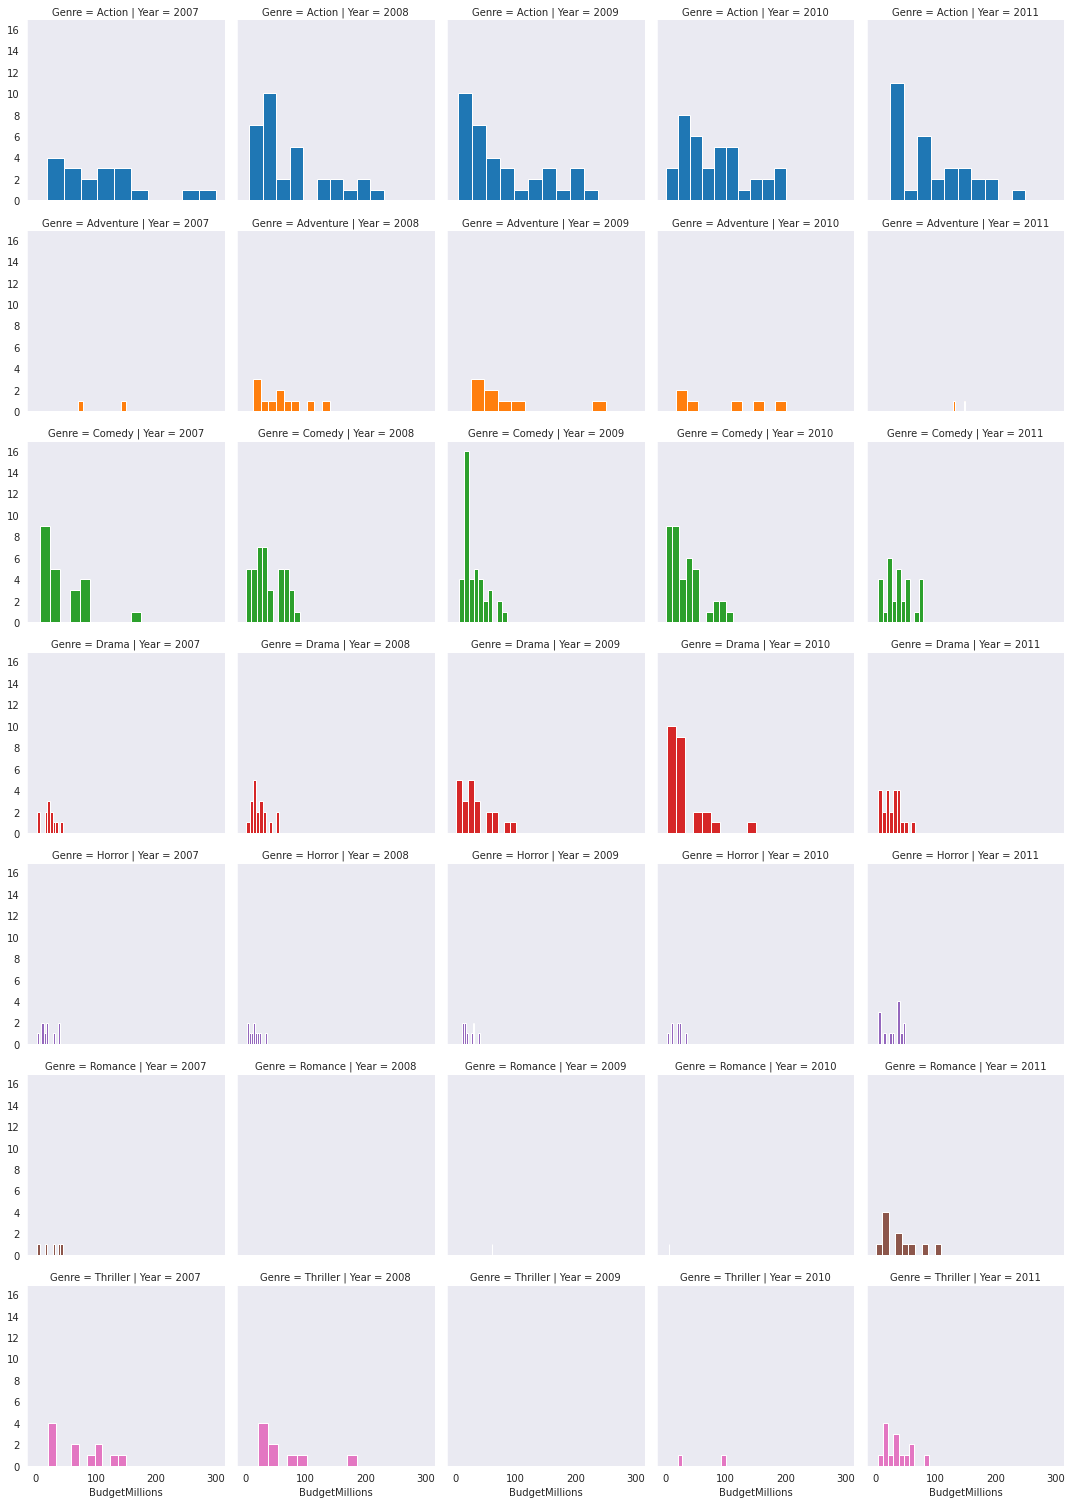

In [ ]:
# Can be populated with any type of chart

fg = sns.FacetGrid(df_movies, row='Genre', col='Year', hue='Genre')
fg = fg.map(plt.hist, 'BudgetMillions')

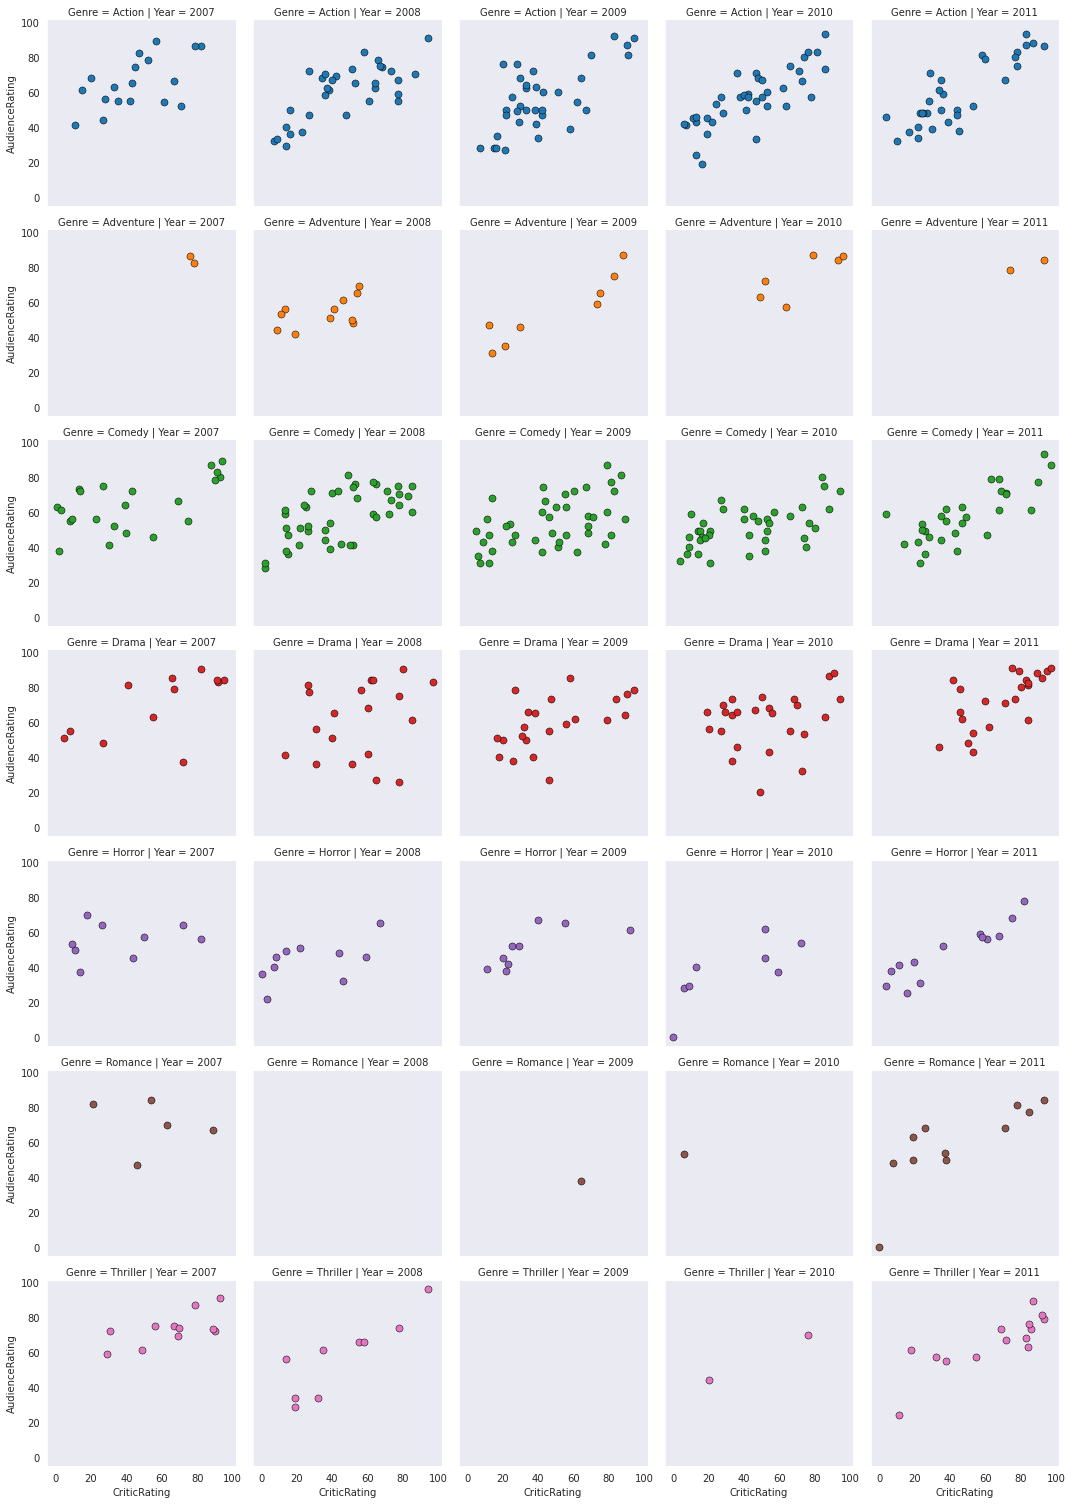

In [ ]:
fg = sns.FacetGrid(df_movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth= 0.5, edgecolor= 'black')

fg = fg.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)

# Coordinates and Diagonals

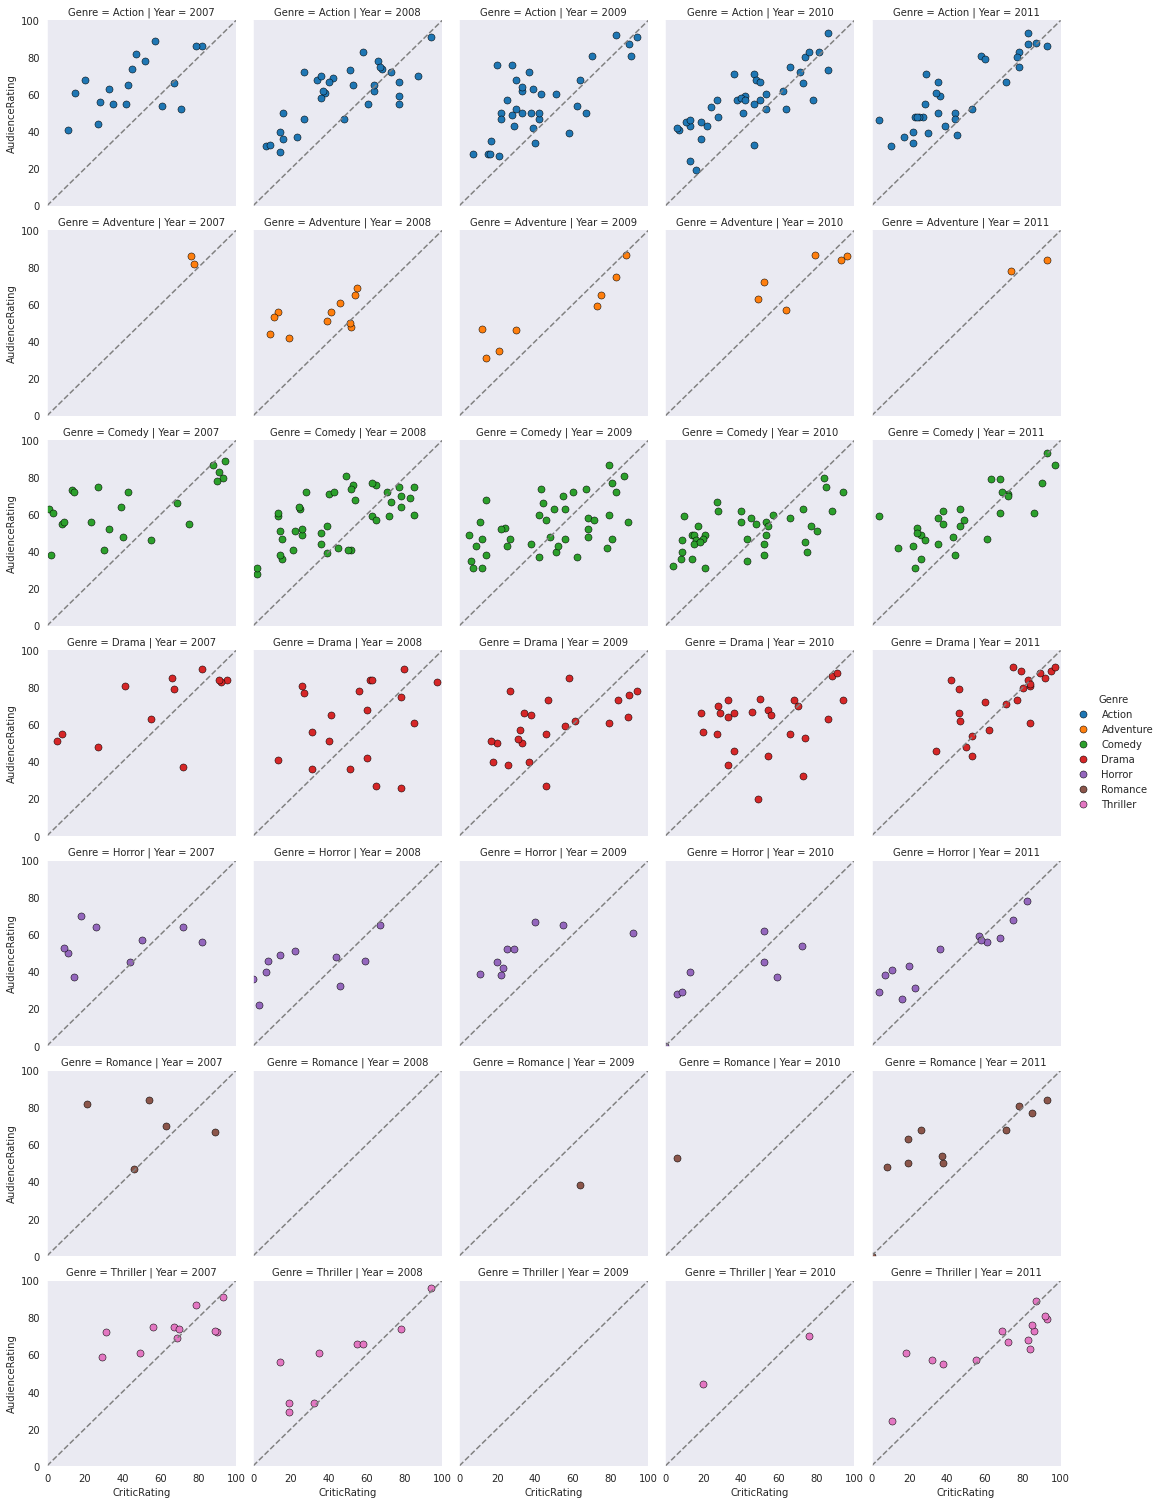

In [ ]:
fg = sns.FacetGrid(df_movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth= 0.5, edgecolor= 'black')

fg = fg.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)

fg.set(xlim=(0,100), ylim=(0,100))

for ax in fg.axes.flat:
  ax.plot((0,100), (0,100), c='gray', ls='--')

fg.add_legend()

# Building Dashboards in Python

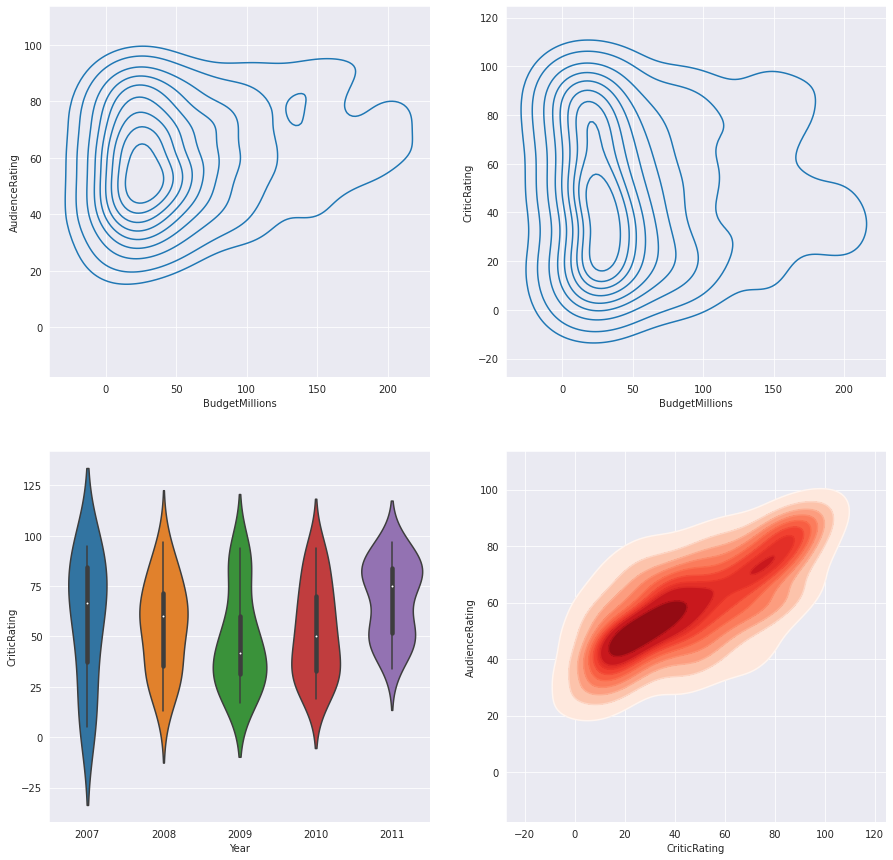

In [ ]:
sns.set_style('darkgrid')

f, axes = plt.subplots(2, 2, figsize=(15,15))
kde3 = sns.kdeplot(df_movies.BudgetMillions, df_movies.AudienceRating, ax=axes[0,0])
kde4 = sns.kdeplot(df_movies.BudgetMillions, df_movies.CriticRating, ax=axes[0,1])
kde3.set(xlim=(-40,230))
kde4.set(xlim=(-40,230))

violin1 = sns.violinplot(data=df_movies[df_movies.Genre == 'Drama'], x='Year', y='CriticRating', ax=axes[1,0])

kde1 = sns.kdeplot(df_movies.CriticRating, df_movies.AudienceRating, shade= True, Shade_lowest= False, cmap='Reds', ax=axes[1,1])
kde2 = sns.kdeplot(df_movies.CriticRating, df_movies.AudienceRating, cmap='Reds', ax=axes[1,1])

plt.show()

For non seaborn plots the procesure is a bit different

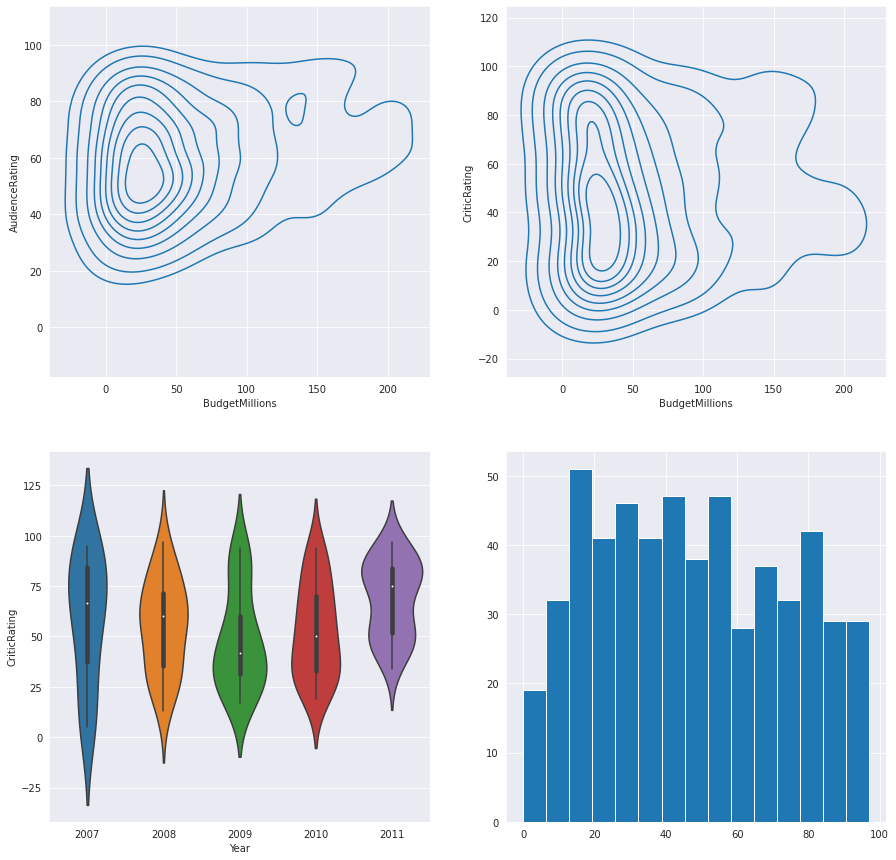

In [ ]:
sns.set_style('darkgrid')

f, axes = plt.subplots(2, 2, figsize=(15,15))
kde3 = sns.kdeplot(df_movies.BudgetMillions, df_movies.AudienceRating, ax=axes[0,0])
kde4 = sns.kdeplot(df_movies.BudgetMillions, df_movies.CriticRating, ax=axes[0,1])
kde3.set(xlim=(-40,230))
kde4.set(xlim=(-40,230))

violin1 = sns.violinplot(data=df_movies[df_movies.Genre == 'Drama'], x='Year', y='CriticRating', ax=axes[1,0])

ax=axes[1,1].hist(df_movies.CriticRating, bins=15)

plt.show()

# Styling Tips

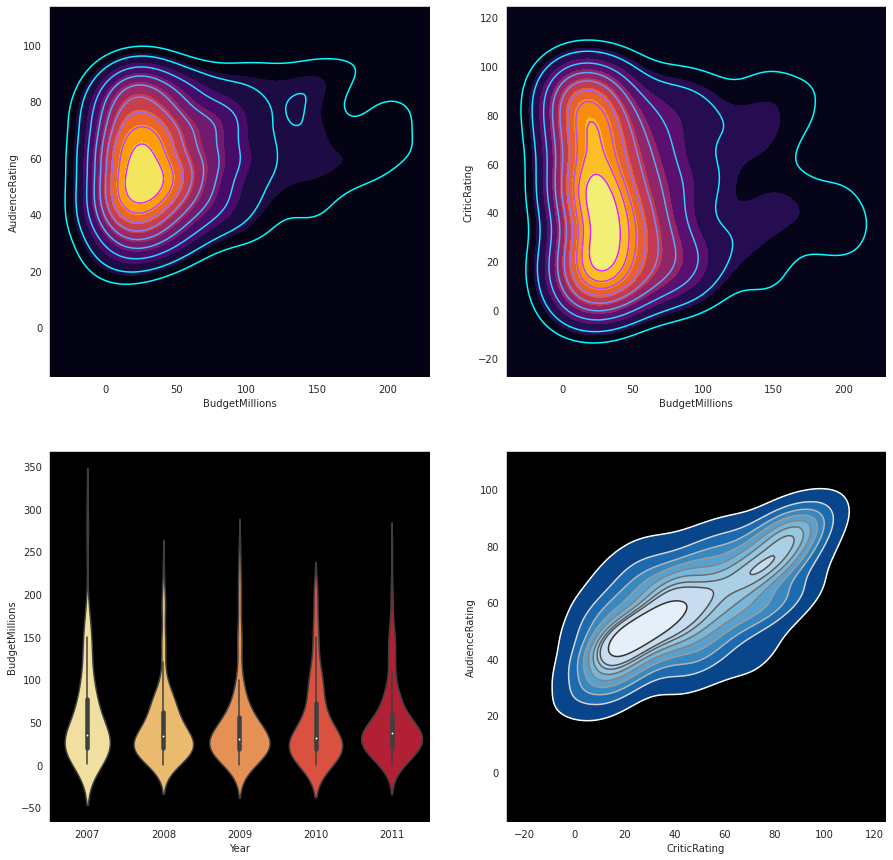

In [ ]:
sns.set_style('dark', {'axes.facecolor':'black'}) #white, whitegrid, dark, darkgrid, ticks

f, axes = plt.subplots(2, 2, figsize=(15,15))

# Plots [0,0] and [0,1]
kde3 = sns.kdeplot(df_movies.BudgetMillions, df_movies.AudienceRating, ax=axes[0,0], shade=True, shade_lowest=True, cmap='inferno')
kde3 = sns.kdeplot(df_movies.BudgetMillions, df_movies.AudienceRating, ax=axes[0,0], cmap='cool') #Outline

kde4 = sns.kdeplot(df_movies.BudgetMillions, df_movies.CriticRating, ax=axes[0,1], shade=True, shade_lowest=True, cmap='inferno')
kde4 = sns.kdeplot(df_movies.BudgetMillions, df_movies.CriticRating, ax=axes[0,1], cmap='cool') #Outline

kde3.set(xlim=(-40,230))
kde4.set(xlim=(-40,230))

# Plot [1,0]
violin1 = sns.violinplot(data=df_movies, x='Year', y='BudgetMillions', ax=axes[1,0], palette='YlOrRd')

# Plot [1,1]
kde1 = sns.kdeplot(df_movies.CriticRating, df_movies.AudienceRating, shade= True, Shade_lowest= False, cmap='Blues_r', ax=axes[1,1])
kde2 = sns.kdeplot(df_movies.CriticRating, df_movies.AudienceRating, cmap='gist_gray_r', ax=axes[1,1])

plt.show()

# Finishing Touches

findfont: Font family ['Console'] not found. Falling back to DejaVu Sans.


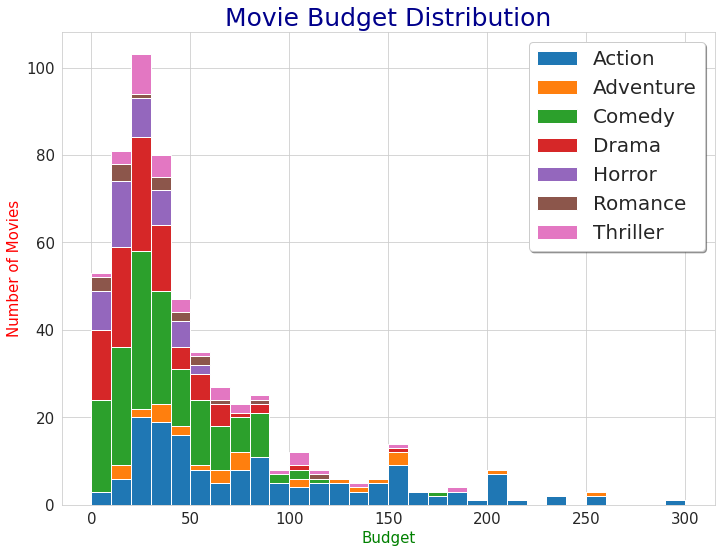

In [ ]:
list1 = []
labels = []

for gen in df_movies.Genre.cat.categories:
  list1.append(df_movies[df_movies.Genre == gen].BudgetMillions)
  labels.append(gen)

sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(11.7,8.7) #Size of an A4 paper

hist5 = plt.hist(list1, bins=30, stacked=True, rwidth=1, label=labels)
plt.title("Movie Budget Distribution", fontsize= 25, color='DarkBlue', fontname='Console')
plt.ylabel("Number of Movies", fontsize=15, color='Red')
plt.xlabel("Budget", fontsize=15, color='Green')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.legend(prop={'size':20}, fancybox=True, shadow=True, frameon= True, framealpha=1)
plt.show()